In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

# Linear and Logistic Regression.
*&copy; The Data Incubator*

You should be familiar with linear regression.  Let's talk about it mathematically.

## Setup

Recall that for this and all other machine-learning setups, $X = \{X\}_{ij}$ is an $n \times p$ matrix of features and $y_i$ is an $n$-vector of labels.  In all **supervised** learning problems, we are trying to build a **model** $f$ (predictive relationship) mapping the feature rows $\{X\}_{j \cdot}$ to each label $y_j$ so that

$$f(X_{j \cdot}) \approx y_j\,.$$

All supervised learning can be represented in this form.  The parameters that can change are:

1. The **model** $f$.  This module will only cover linear models.  We will often assume that one of the columns of $X$ is the constant $1$.  Therefore,

$$ f(X_{j \cdot}) = X_{j\cdot} \cdot \beta$$

represents the entire linear model concisely, including the constant intercept term.

1. The **error distribution** of how $y_j$ are distributed.  If the model $f$ is linear, varying the error distribution gives us different classes of the General Linear Models (GLM)s.  We'll talk about the Logistic Regression (arguably the most important GLM after linear regression) but there are many others.  To learn more about GLMs, there are a good set of notes available [here](http://data.princeton.edu/wws509/notes/a2.pdf).

With both a model and the error distribution, we can easily compute find the likelihood function.  The problem in GLM is to choose the model that maximizes the likdlihood function.

## Linear Regression

Remember the basic picture of linear regression errors:

![$L^1$ versus $L^2$ regularization](../images/linear_regression_error.gif)

Linear Regression is perhaps the simplest linear model $f(X_{j \cdot}) = \sum_i \beta_i X_{ji}$.  The error model assumes the $y_j$'s are independent and normally distributed around $X_{j\cdot} \cdot \beta$.  The likelihood function is given by

$$ L(\beta) = \prod_j \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\left( \frac{X_{j\cdot} \cdot \beta - y_j}{2 \sigma} \right)^2 \right]$$

Since $\log$ is monotonic, we can also maximize the log-likelihood, a few calculations show us that the negative log-likelihood (up to a linear transformation) is

$$- \log(L(\beta)) \sim \| y - X \beta \|^2\,.$$

Here, $\| z \| = \| z \|_2 = \sum_i |z_i|^2 $ is the $L^2$ norm.  The objective is to minimize this quadratic:

$$ \min_\beta \| y - X \beta \|^2\,.$$

Of course, this is the familiar expression for linear regression.  We could minimize $\beta$ via gradient descent, but it turns out that the solution has a closed form, 

$$ \hat \beta = (X^T X)^{-1} X^T y\,. $$

** Exercises: ** 

1. What about the intercept term?
1. Prove that the solution $\hat \beta$ actually minimizes the negative log-likelihood.  (Hint: $X (X^T X)^{-1}X^T$ is the projection operator onto the subsapce spanned by the columns of $X$).
1. What happens if $X^T X$ is singular, e.g. $X$ has two columns that are co-linear.  What does this mean in terms of identificaiton?  When might this occur in the data in real life?
1. What happens when $p \gg n$?  How do you deal with this?
1. What happens if $X$ has two rows that are co-linear?  Why might this happen in real life?
1. What is the effect of outliers?  How do you deal with them?
1. What if $y$ values are always positive?  What if $y$ values are in a fixed range $[a,b]$?

### Using Linear Regression

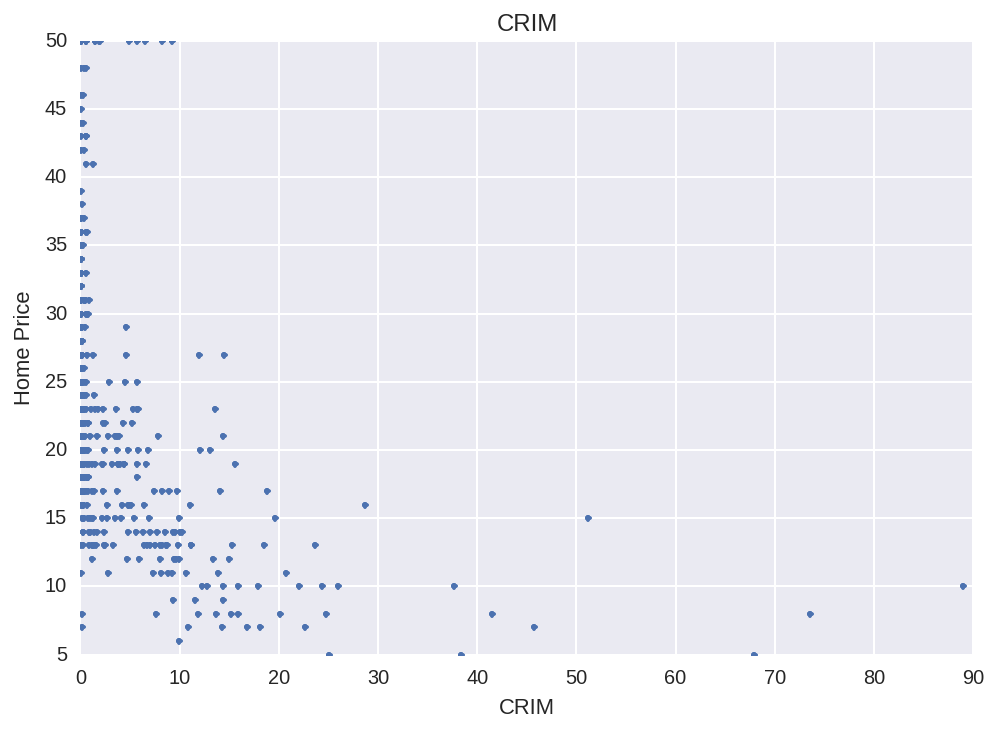

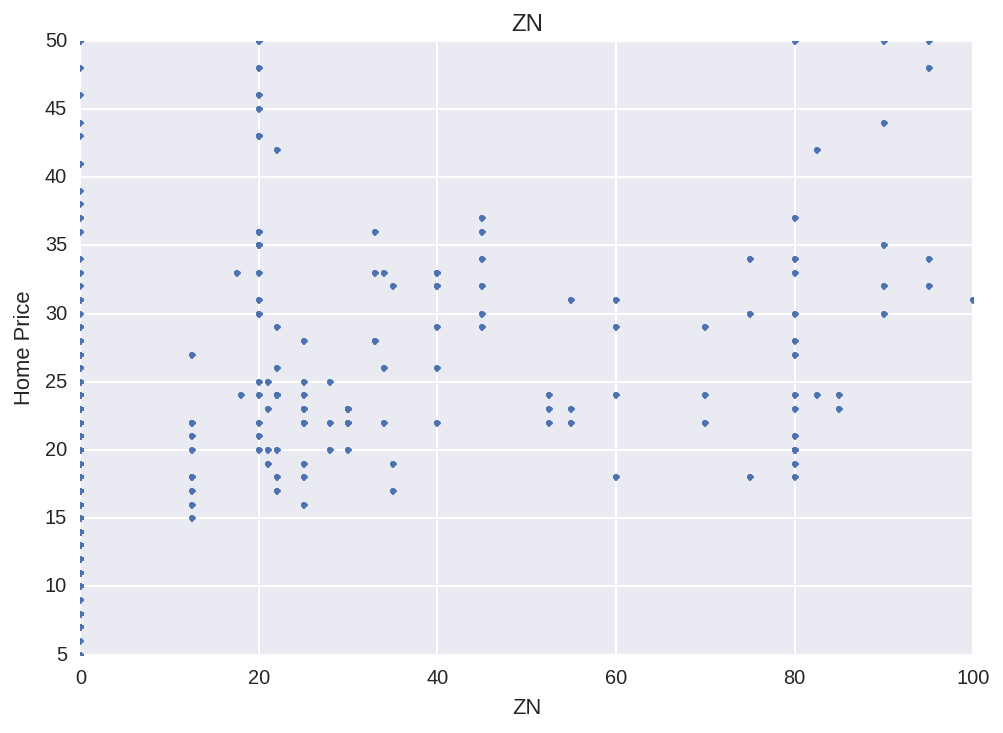

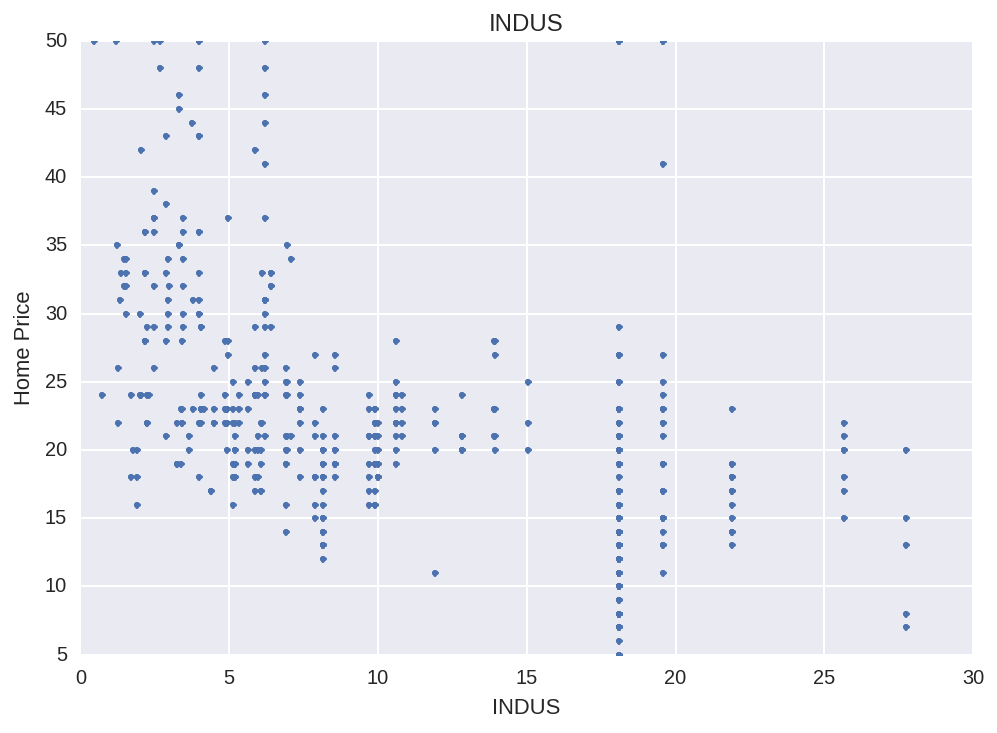

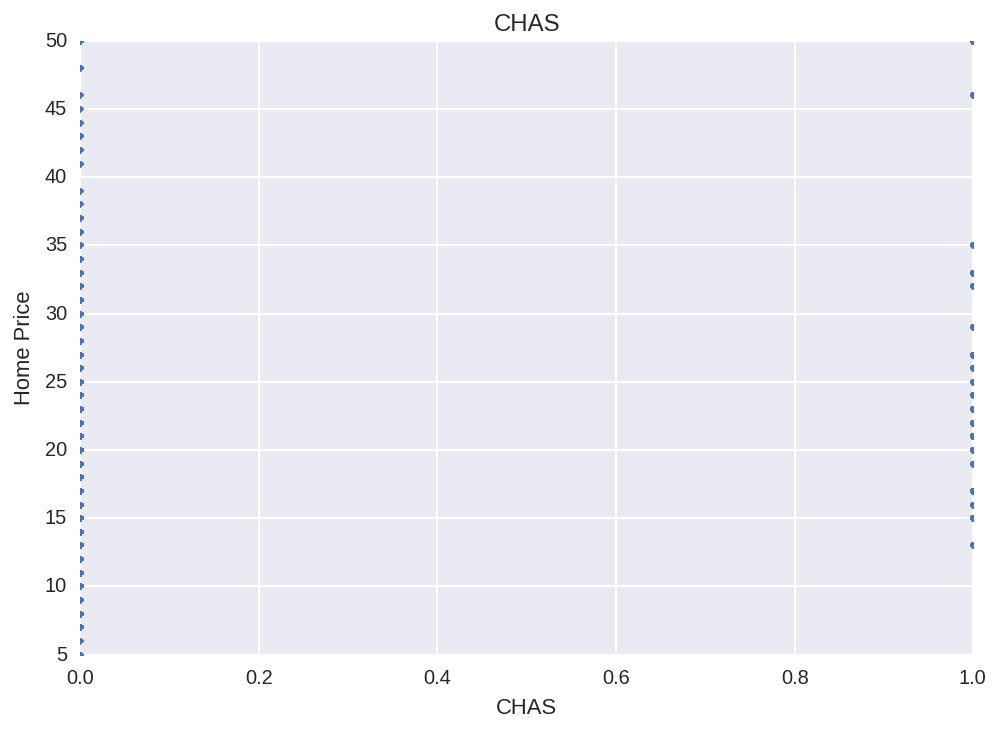

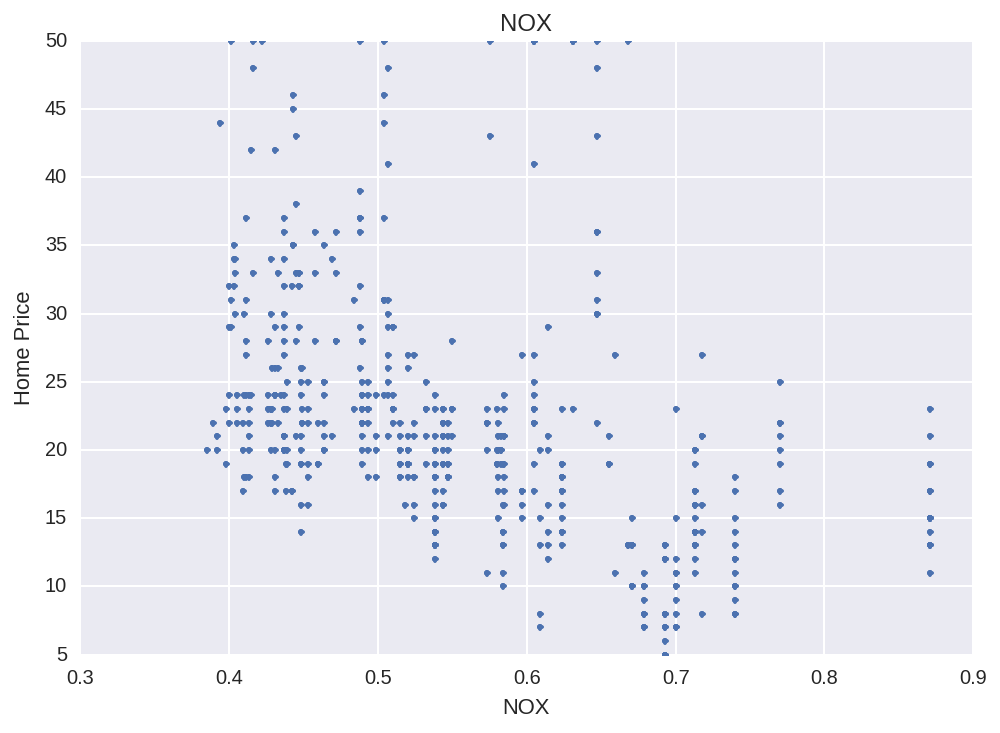

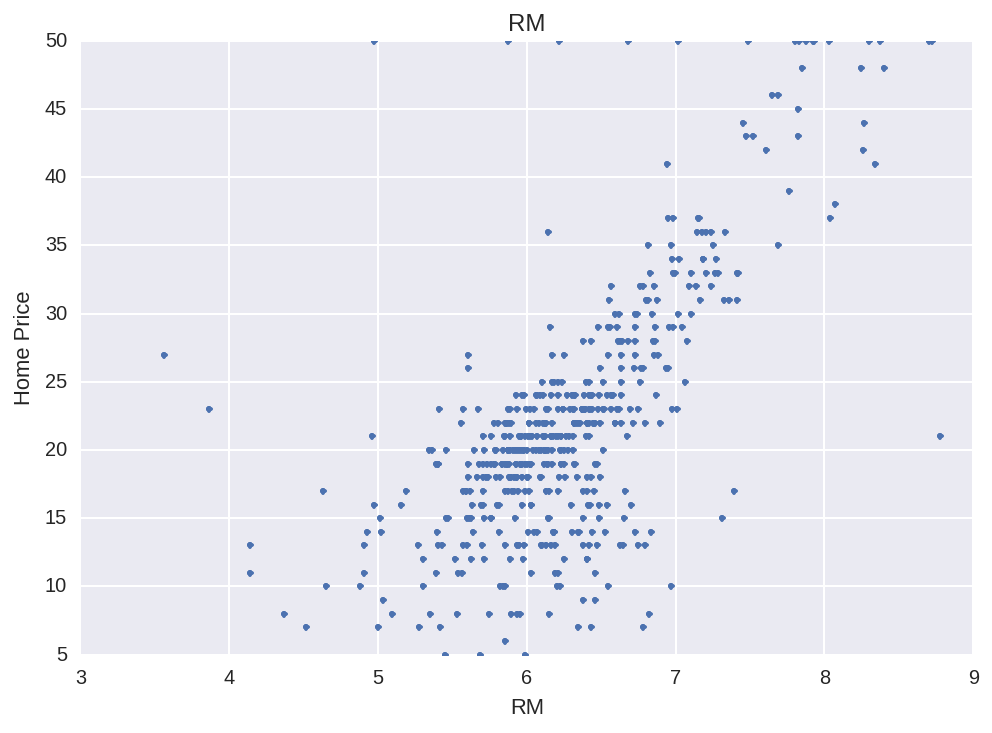

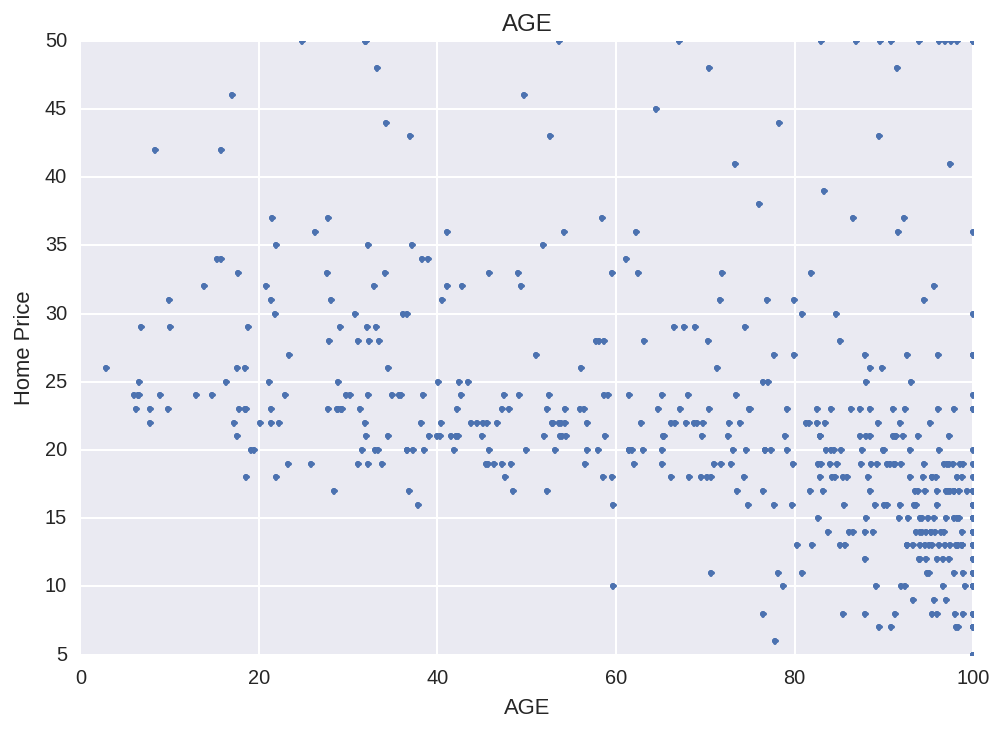

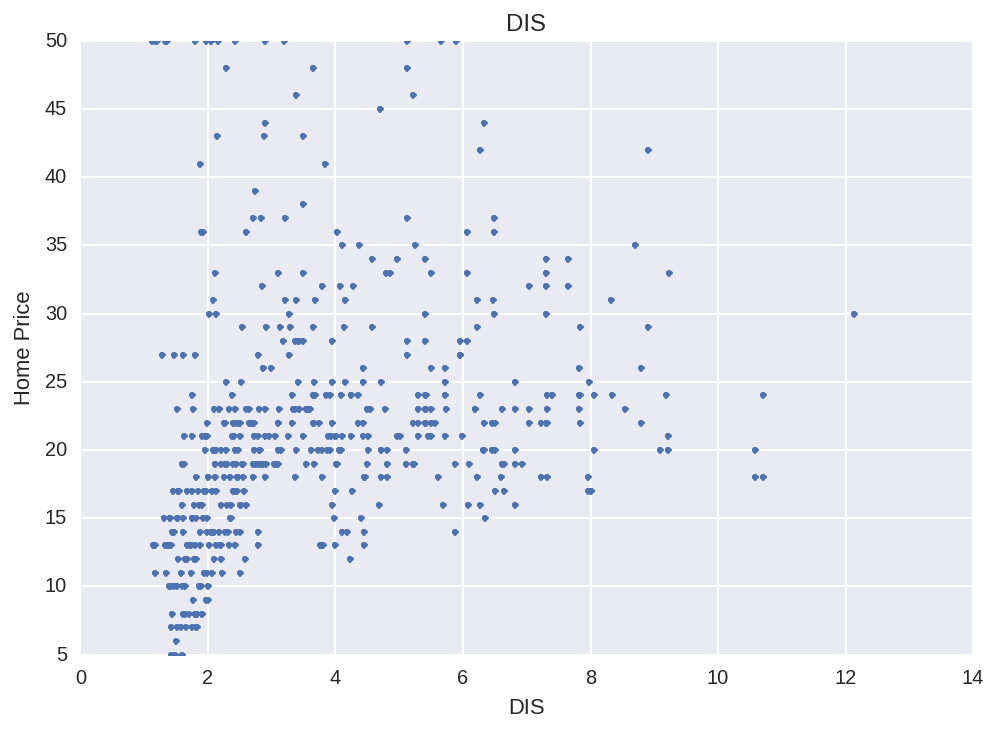

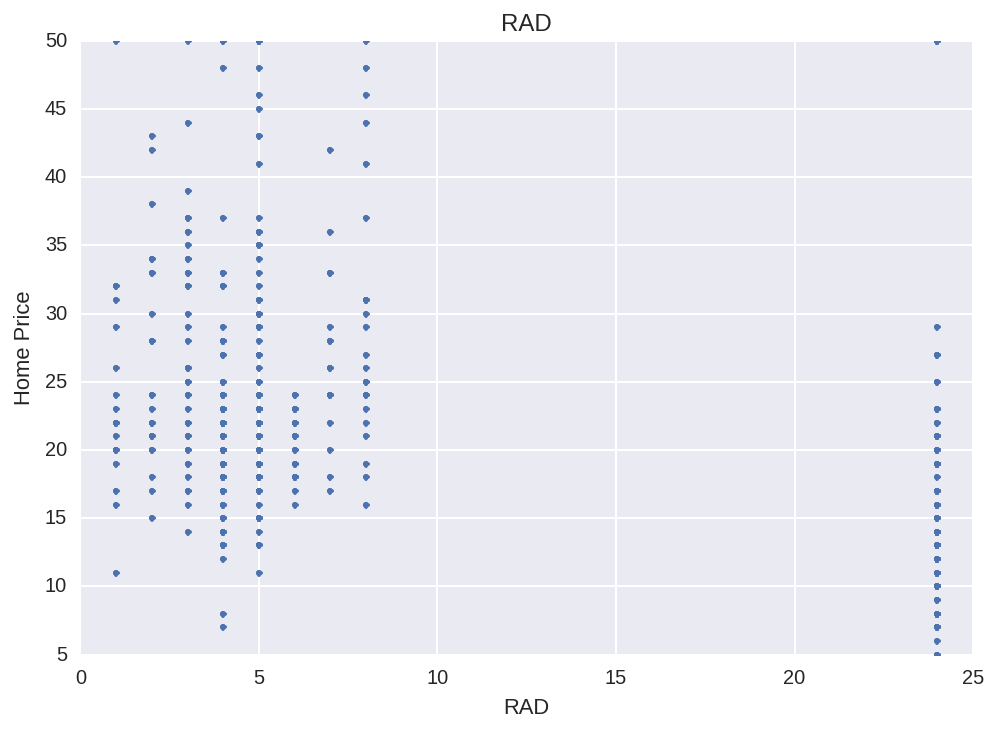

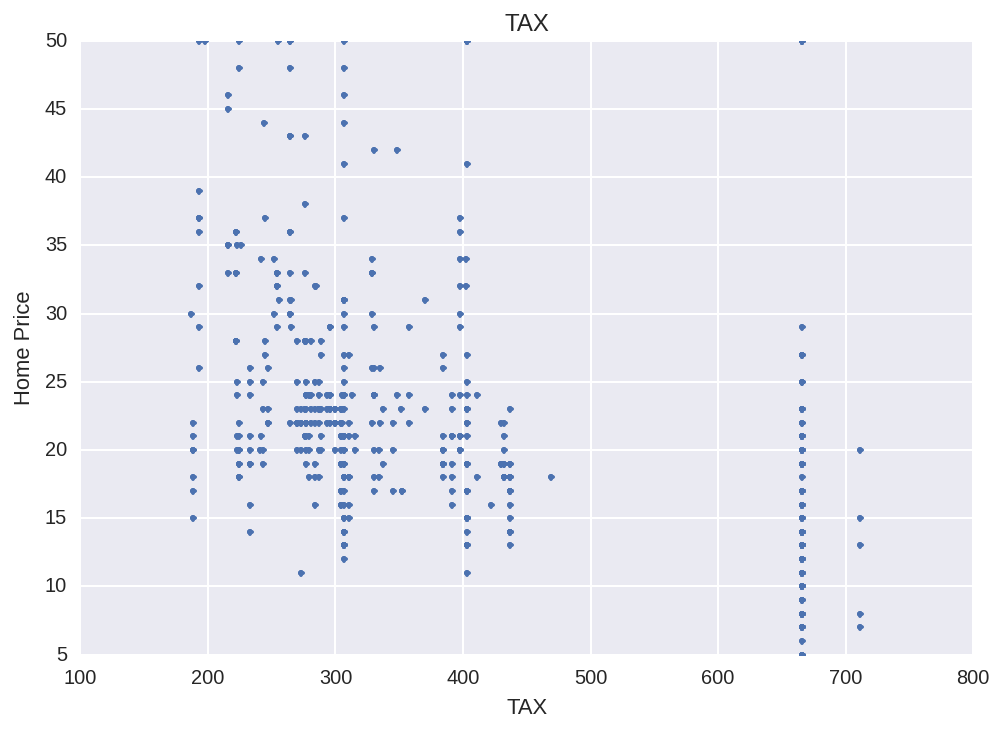

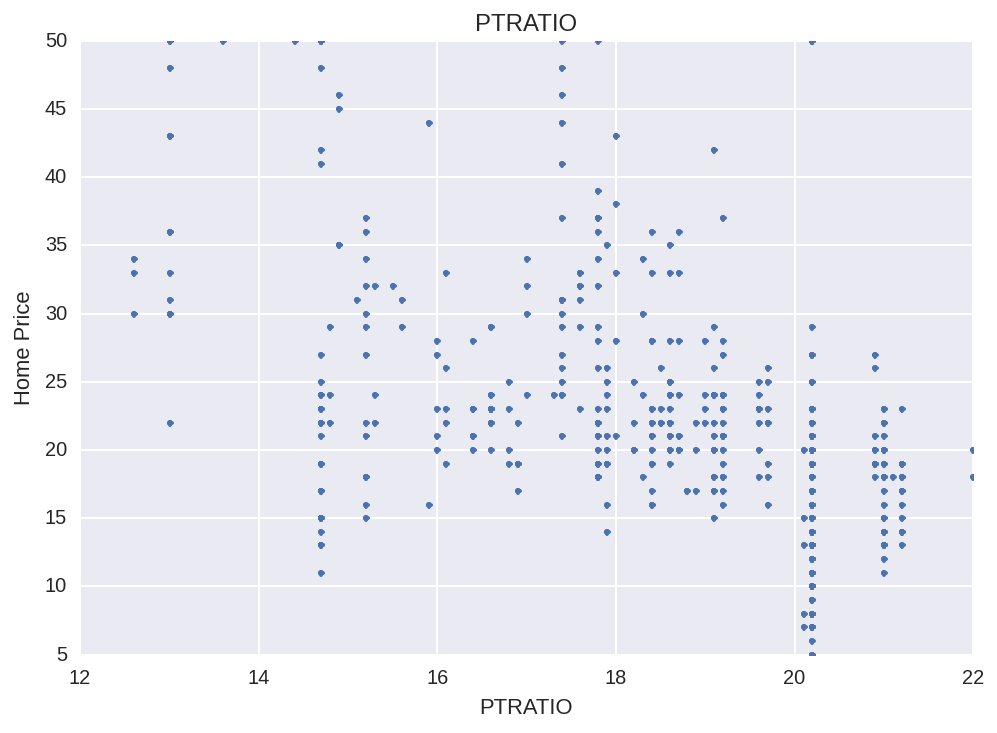

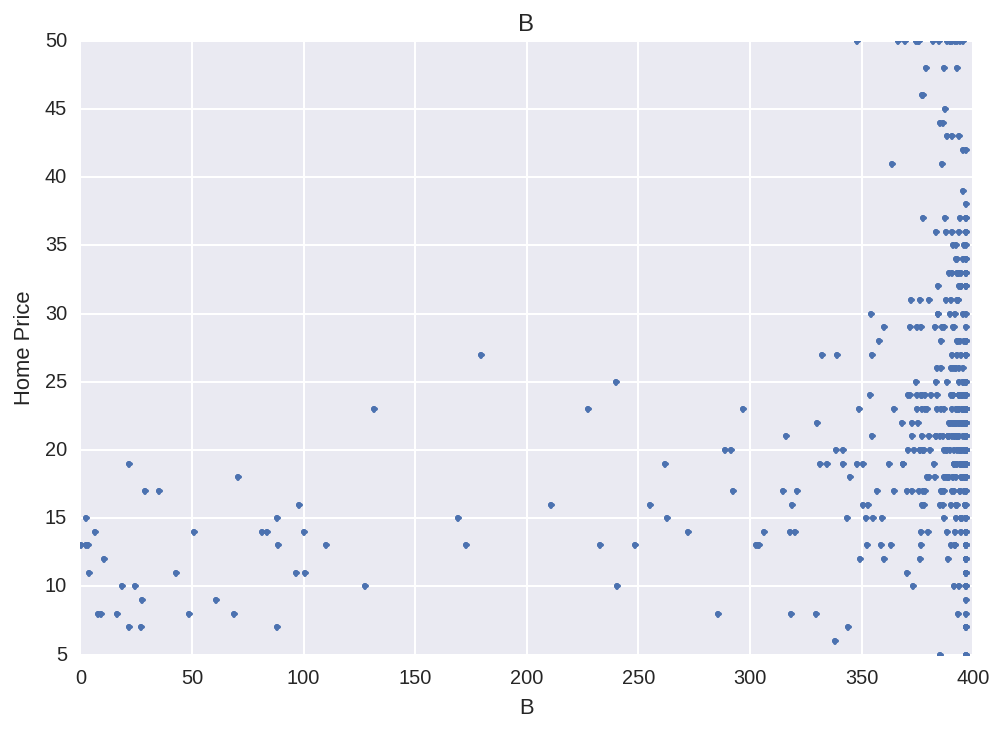

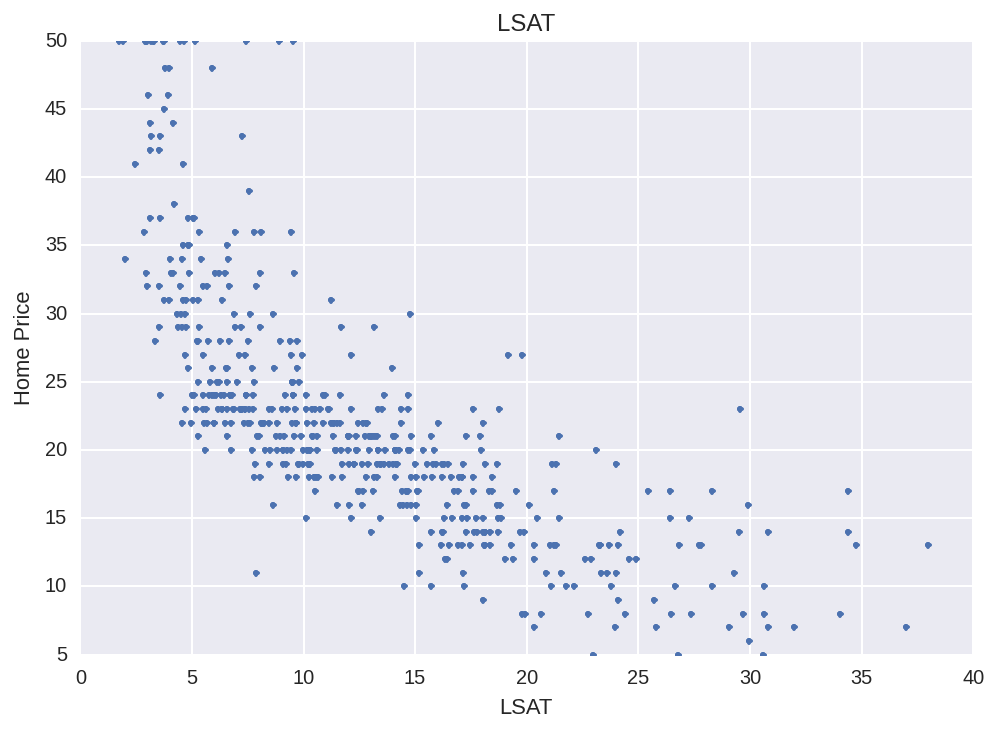

In [2]:
from sklearn import datasets, linear_model, utils, preprocessing
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import fetch_mldata
import numpy as np
import seaborn as sns
mnist = fetch_mldata('housing')

# This dataset gives house prices in Boston based on a variety of factors.
# for more information about what the fields mean, checkout http://mldata.org/repository/data/viewslug/regression-datasets-housing/
original_columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSAT"]

np.random.seed(42)
Xraw, y = utils.shuffle(mnist.data, mnist.target)
Xraw = pd.DataFrame(Xraw, columns=original_columns)
y = pd.Series(y)

# using a linear model
clf = linear_model.LinearRegression()

# first, let's plot the data
for col in Xraw:
    plt.figure()
    plt.title(col)
    plt.plot(Xraw[col], y, '.')
    plt.xlabel(col)
    plt.ylabel('Home Price')

In [4]:
# Here are some transformations from the data
# Sometimes, features that are negatively correlated are better represented as positively correlated to the inverse
# Someitmes, relationships aren't linear but step functions.

X = Xraw.copy()
X["INV_CRIM"] = 1./X.CRIM
X["INDUS7"] = X.INDUS <= 7.
X["INDUS16"] = 1. * (X.INDUS <= 16.)
X["INV_NOX"] = 1./X.NOX
X["AGE75"] = 1. * (X.AGE <= 76.)
X["RAD15"] = 1. * (X.RAD <= 15.)
X["TAX500"] = 1. * (X.TAX <= 500.)
X["PTRATIO19"] = X.PTRATIO <= 19.
X["B350"] = 1. * (X.B <= 350.)
X["INV_LSAT"] = 1. / X.LSAT
X=X.astype(float)  # coerce booleans to a float
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,INV_CRIM,INDUS7,INDUS16,INV_NOX,AGE75,RAD15,TAX500,PTRATIO19,B350,INV_LSAT
0,0.09178,0,4.05,0,0.510,6.416,84.1,2.6463,5,296,...,10.895620,1,1,1.960784,0,1,1,1,0,0.110619
1,0.05644,40,6.41,1,0.447,6.758,32.9,4.0776,4,254,...,17.717931,1,1,2.237136,1,1,1,1,0,0.283286
2,0.10574,0,27.74,0,0.609,5.983,98.8,1.8681,4,711,...,9.457159,0,0,1.642036,0,1,0,0,0,0.055340
3,0.09164,0,10.81,0,0.413,6.065,7.8,5.2873,4,305,...,10.912265,0,1,2.421308,1,1,1,0,0,0.181159
4,5.09017,0,18.10,0,0.713,6.297,91.8,2.3682,24,666,...,0.196457,0,0,1.402525,0,0,0,0,0,0.057904


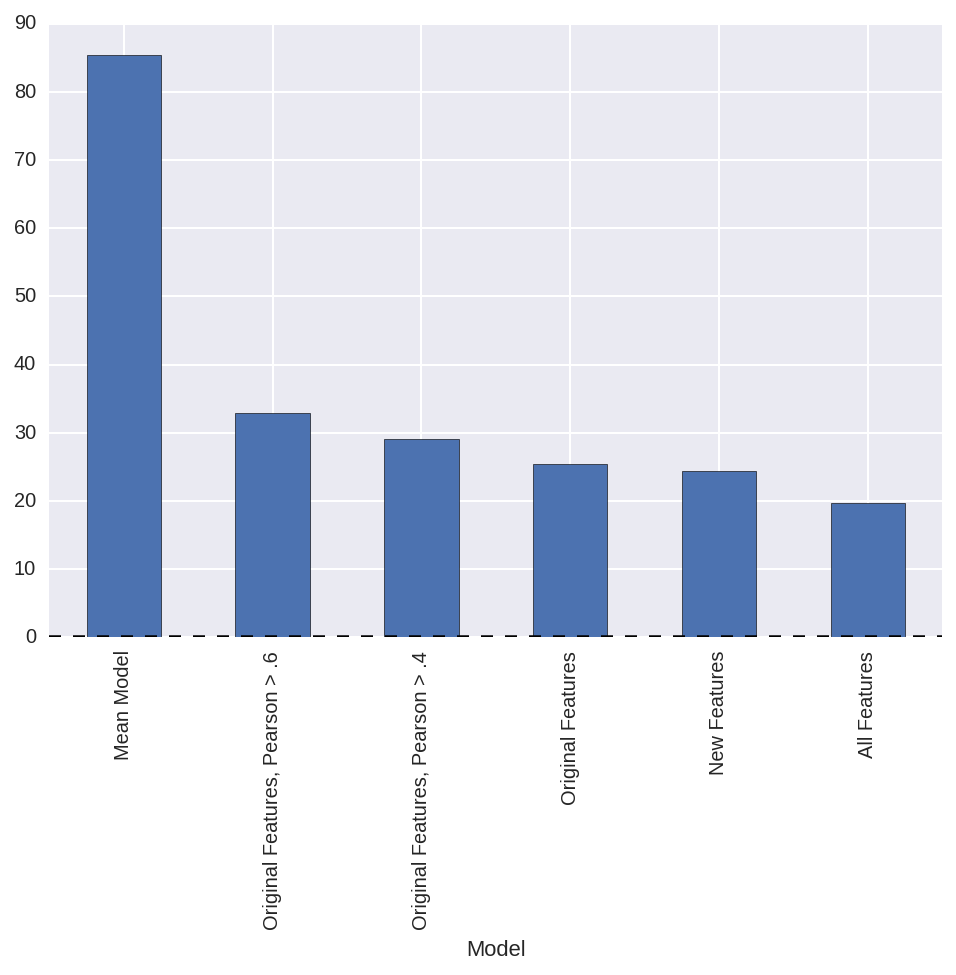

In [6]:
# Let's try to evaluate the model on different sets of features and compare their performance

from sklearn import cross_validation
from scipy import stats

cv = cross_validation.ShuffleSplit(len(y), n_iter=20, test_size=0.2, random_state=42)
def compute_error(clf, X, y):
    return - cross_validation.cross_val_score(clf, X, y, cv=cv, scoring='mean_squared_error').mean()

def abs_corr(x, y):
    return np.abs(stats.pearsonr(x, y)[0])

new_columns = ['INV_CRIM', 'ZN', 'INDUS7', 'INDUS16', 'CHAS', 'INV_NOX', 
               'RM', 'AGE75', 'DIS', 'RAD15', 'TAX500', 'PTRATIO19', 'B350', 'INV_LSAT']

model_performance = pd.DataFrame([
    ("Mean Model", y.var()),
    ("Original Features, Pearson > .6", compute_error(clf, X[[col for col in original_columns if abs_corr(X[col], y) > .6]], y)),
    ("Original Features, Pearson > .4", compute_error(clf, X[[col for col in original_columns if abs_corr(X[col], y) > .4]], y)),
    ("Original Features", compute_error(clf, X[original_columns], y)),
    ("New Features", compute_error(clf, X[new_columns], y)),
    ("All Features", compute_error(clf, X, y)),
], columns=["Model", "MSE"])
model_performance.set_index("Model")
model_performance.plot(x="Model", y="MSE", kind="Bar")

## A few notes:

1. A good baseline is to see how well a mean model performs, that is, take a model that predicts `y.mean()` and whose MSE is going to be `y.var()`.
1. How many (original) features have a correlation coefficient > .6?  These explain the majority of the error (compared with the baseline model).
1. One way to prevent this overfitting is to choose only those feautes $X_{\cdot i}$ that are highly correlated with $y$.  This can lead much better models.

**Exercise:** 
1. We tried to predict $y$ but since it is non-negative, it might make sense to predict $\log(y)$.  What metric would you use to be able to evaluate which one is better?


## Ridge Regression

In the problem above, we used an *ad-hoc* criteria to select features.  Here's a more principled way to do it.  Suppose we place an iid normally distributed prior on $\beta$ centered around 0.  

$$ L(\beta) \propto \prod_j \exp\left[ -\frac{1}{2}\left( \frac{X_{j\cdot} \cdot \beta - y_j}{\sigma} \right)^2 \right]\prod_i \exp \left[ -\frac{\alpha}{2} \left(\frac{\beta}{\sigma} \right)^2\right]$$

Then the negative log-likelihood is (up to a linear transformation)

$$- \log(L(\beta)) \sim \| y - X \beta \|^2 + \alpha \| \beta \|^2\,.$$

After compleing the square, it turns out that the solution has a closed form, 

$$ \hat \beta = (X^T X + \alpha I)^{-1} X^T y\,. $$

To get some motivation for what's happening, use the *singular value decomposition*

$$ X = U \Sigma V^T $$

We  can see that 

$$ \hat \beta = V D U^T y $$

where

$$ D_{ii} = \frac{\Sigma_{ii} }{\Sigma_{ii}^2 + \alpha}\,. $$

When $\alpha = 0$, $D_{ii} = \frac{1}{\Sigma_{ii}}$ and it decreases to 0 as $\alpha \to \infty$.  The smaller $\Sigma_{ii}$, the faster this decrease to 0 (for a given level of $\alpha$).  So smaller $\Sigma_{ii}$ are "shrunk" faster than larger $\Sigma_{ii}$ and we get the "significant values" are left.

**Question:**
1. Are "significant values" always left?  What pre-processing step might one do to ensure this?
1. Can you prove the formula for $\hat \beta$ for Ridge Regression from ordinary Linear Regression?
1. What is the corresponding prior for plain-vanilla linear regression?
1. Compared with linear regression, how to you expect the $\beta$'s to behave?  How does this behavior change as you vary $\alpha$?

This technique is called many things including, **Shrinkage**, **$L^2$-regularization**, ** Tikhonov-Regularization**, **Ridge-regression**.  We can use cross-validation to choose an optimal value of $\alpha$.  The answer is still quadratic in $\beta$ so we can compute the answer in close form.

Solve for $\alpha_1$ and get $\beta_1$.
Need to sovle for $\alpha_2 \sim \alpha_1$.  $\beta_2 \sim \beta_1$ $\beta_0$

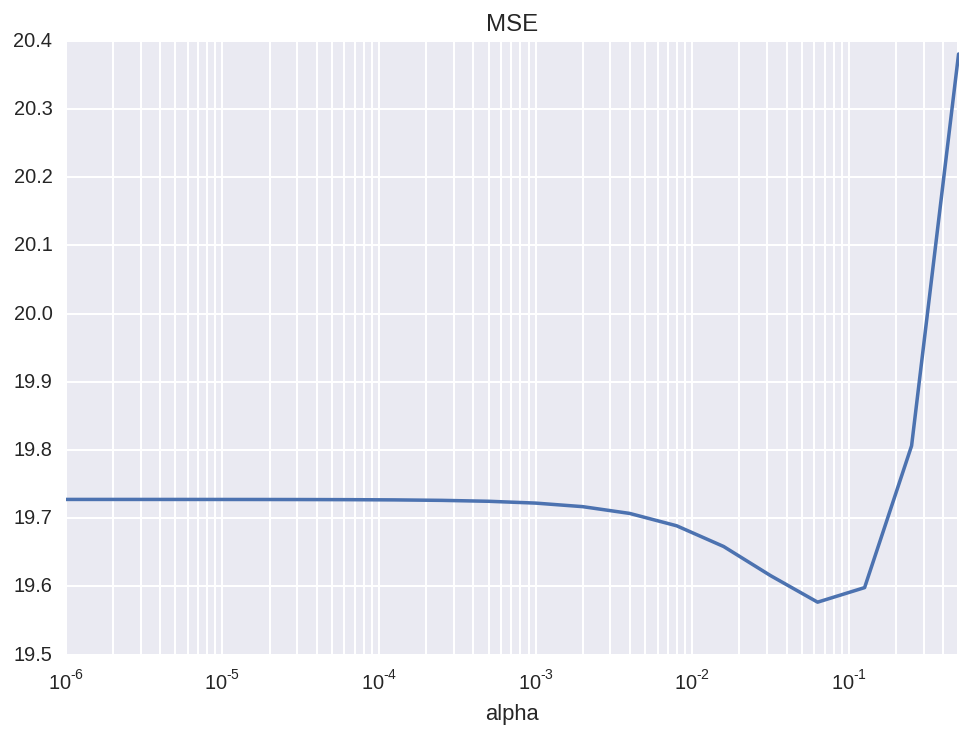

In [8]:
# Ridge regression using cross validation linear_model.Ridge
import numpy as np
np.random.seed(42)

alphas = np.logspace(-6., -.3, 20)
ridge_models = pd.DataFrame(
    [(alpha,
      "Ridge Regression with alpha = %f" % alpha, 
      compute_error(linear_model.Ridge(alpha=alpha), X, y)) for alpha in alphas]
, columns=['alpha', 'Model', 'MSE'])
ridge_models.plot(x='alpha', y='MSE', logx=True, title='MSE')

## Lasso Regression

Lasso is like ridge regression but has the ability to automatically select features.  The objective function to minimize is

$$ \frac{1}{2 n} \| y - X^T \beta \|^2 + \alpha \|\beta\|_1 $$

where $\|\beta\|_1 = \sum_i |\beta_i| $ is the $L^1$ norm (sum of the absolute values) of $\beta$ and $n$ is the number of samples.  This is called **Lasso Regression** or **$L^1$-Regularization** because it is basically Ridge Regression where the extra prior term is an $L^1$ penalty instead of an $L^2$ penalty.  Lasso has a feature selection property where many weights on features are zero (i.e. those features are not selected).  This is basically explained in the following picture

![$L^1$ versus $L^2$ regularization](../images/L1_vs_L2.png)

## Elastic Net

You can combine both $L^1$ and $L^2$ regularization in something called Elastic Net.

### Cross-Validation and Warm Starts

There's no closed-form solution for either Lasso or Elastic net so they required a numerical solution, e.g. gradient descent.  Take a look at the functions `linear_model.lasso_path` and `linear_model.enet_path`, which use a warm start technique to speed up the cross-validation.  Also note that there is `linear_model.RidgeCV`, `linear_model.LassoCV`, which return the best estimators using warm-starts.  Note that the default cross-validation is the slow leave-one-out algorithm so you'll probably want to tell it to use something like KFold cross-validation:
``` python
linear_model.RidgeCV(
    alphas=np.logspace(-1, 1, 5),
    cv=cross_validation.KFold(5))
)
```

**Questions:** 

1. In $L^2$ regularization, the prior on $\beta$ are i.i.d normal distributions centered around 0.  What is the analogous prior for $L^1$ regularization?
2. Use `lasso_path` to rewrite the inefficient cross validation done below and reproduce the same plot.  Does it run faster?


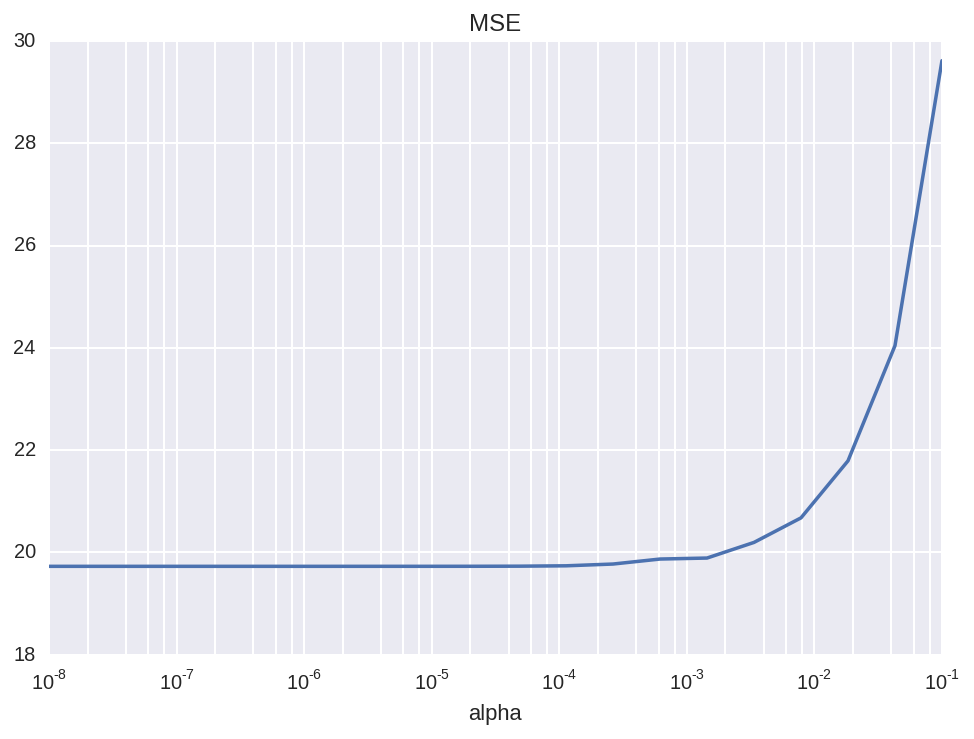

In [9]:
# Lasso Regression with cross validation
np.random.seed(42)
alphas = np.logspace(-8., -1., 20)

lasso_models = pd.DataFrame(
    [(alpha,
      "Lasso with alpha = %f" % alpha,
      compute_error(linear_model.LassoLars(alpha=alpha), X, y)) for alpha in alphas]
, columns=['alpha', 'Model', 'MSE'])
lasso_models.plot(x='alpha', y='MSE', logx=True, title='MSE')


**Exercise**: Plot out the absolute magnitude of the coefficients of the linear regression and the $L^1$ and $L^2$-regularized regressions.  Which ones are the most important?

## Using a linear model to combine different signals.

One of the great uses of linear regression (or any regression / classificaiton technique) is to combine different machine-learned signals.

For example, we can try to use non-parametric techniques on the residual error from a linear classifier.  Since the linear classifier has found all the 'linear signals', this will find some of the remaining 'non-linear signals'.

Below is an example of a model that does this.  When combining multiple signals in Scikit-Learn, it's good to roll your own estimator so that you can take advantage of the cross-validation infrastructure of this more complex model.

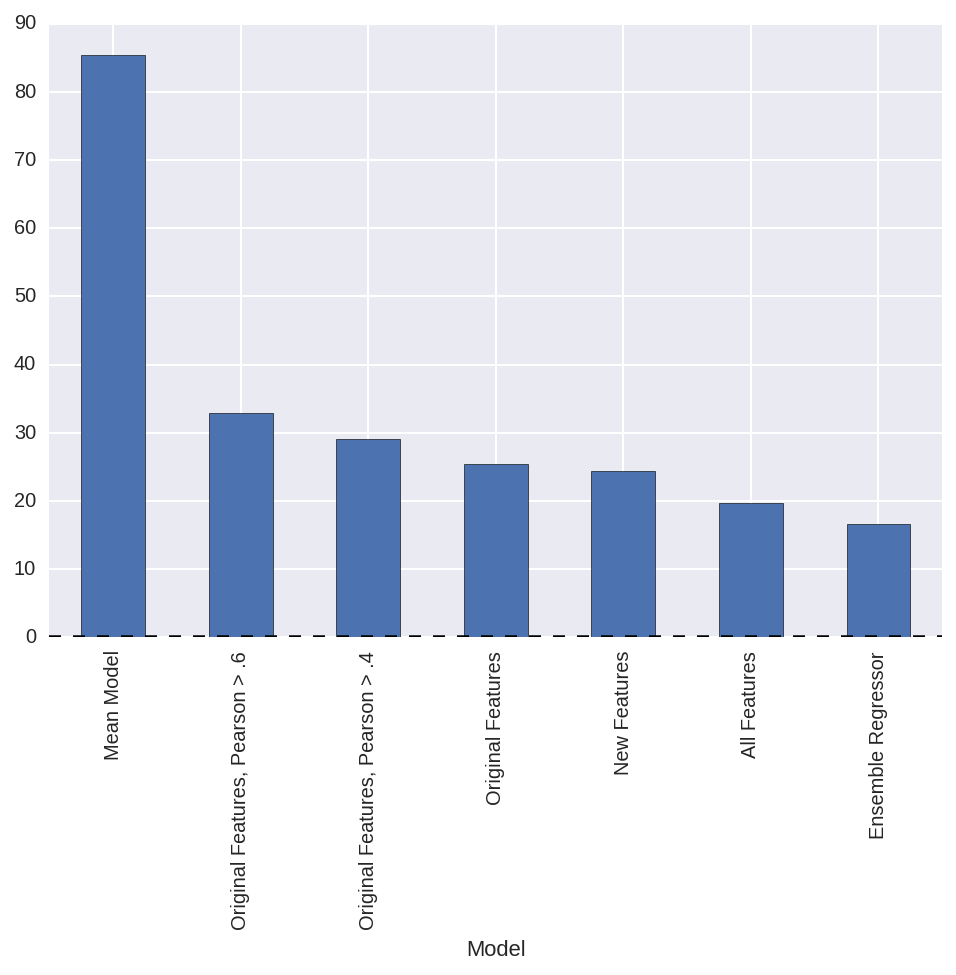

In [10]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin 
from sklearn import neighbors
from sklearn import ensemble

# To create your own estimator, simply create a subclass of BaseEstimator, RegressorMixin
# and implement the __init__, fit, and predict functions
# To learn more about rolling your own estimator, checkout
# http://scikit-learn.org/stable/developers/#rolling-your-own-estimator

class EnsembleRegressor(BaseEstimator, RegressorMixin):
    """Joins a linear, random forest, and nearest neighbors model."""
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.linear_regression = linear_model.LinearRegression().fit(X, y)
        y_err = y - self.linear_regression.predict(X)

        self.nearest_neighbors = neighbors.KNeighborsClassifier(n_neighbors=5).fit(X, y_err)
        self.random_forest = ensemble.RandomForestRegressor(min_samples_leaf=20).fit(X, y_err)

        X_ensemble = pd.DataFrame({
            "NEAR": self.nearest_neighbors.predict(X),
            "FOREST": self.random_forest.predict(X),
            "LINEAR": self.linear_regression.predict(X),
        })
        self.ensemble_regression = linear_model.LinearRegression().fit(X_ensemble, y)
        return self
    
    def predict(self, X):
        X_ensemble = pd.DataFrame({
            "NEAR": self.nearest_neighbors.predict(X),
            "FOREST": self.random_forest.predict(X),
            "LINEAR": self.linear_regression.predict(X),
        })
        return self.ensemble_regression.predict(X_ensemble)

residual_regressor_performance = pd.DataFrame([
    ("Ensemble Regressor", compute_error(EnsembleRegressor(), X, y))
], columns=["Model", "MSE"])
model_performance=model_performance.append(residual_regressor_performance)
model_performance.plot(x="Model", y="MSE", kind="Bar")

**Exercises:** 

1. Add another regression technique into the mix (besides the 3 used here).  Does it improve performance?
1. The values of `n_neighbors` and `min_samples_leaf` were set at random.  Use cross validation to select the value.

## Logistic Regression

In Logistic Regression, the values of $y$ are categorical ($0$ or $1$) and assumed to be distributed binomially.  We assume that the probability $p(X_{j\cdot})$ that $y = 1$ is related to $X$ via the logit function:

$$ \mbox{logit }(p(X_{j\cdot})) = \log \frac{p(X_{j\cdot})}{1-p(X_{j\cdot})} = X_{j\cdot} \cdot \beta\,. $$

Notice that the logit function $\log \frac{\cdot}{1-\cdot}$ is just the log odds and maps the real numbers $[0,1]$ to $\mathbb{R}$.  The full likelihood function is given by

$$ L(\beta) = \prod_j p(X_{j\cdot})^{y_j} (1-p(X_{j\cdot}))^{1-y_j}\,. $$

Notice that the log-likelihood is just 
$$ \log(L(\beta)) = \sum_j y_j \log(p(X_{j\cdot})) + (1-y_j) \log(1-p(X_{j\cdot})) $$
Since the objective is to maxmize $L$, we can use gradient descent (on $\log(L)$) to compute the answer,

$$ \frac{\partial \log(L(\beta))}{\partial \beta} = \sum_j (y_j - p(X_{j\cdot})) X_{j\cdot} $$

The gradient is quite intuitive.  The derivation is worked out [here](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf).

In the following example, we'll try to predict whether the home price is greater than or less than $25K.

**Question:** 
1. What is the negative log-likelihood that is being minimized?
1. The Scikit Learn library already contains $L^1$ and $L^2$ regularization built in.  Can you write down the minimization problem with the $L^1$ and $L^2$ penalties.
1. There's a `weight` parameter to Scikit's `LogisticRegression` that let's you reweight different training examples.  When might you want to do this?  One answer is if one class is very common (e.g. 99% of the data), you can downsample it it and then use the weight to give an unbiased estimate.  A classic example is click-prediction in advertising, where clicks are rare compared to non-clicks.

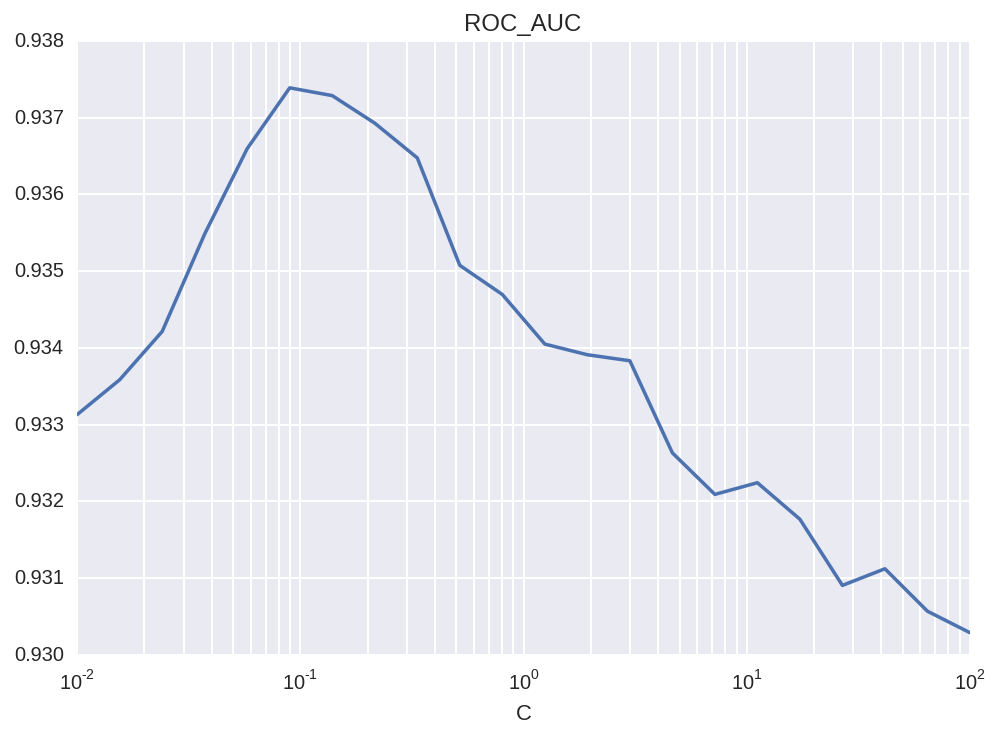

In [11]:
# Logistic Regression
# Sklearn's logistic regression comes with ROC-AUC as our objective

np.random.seed(42)

y_cat = y > 25.
logistic_clf = linear_model.LogisticRegression()

Cs = np.logspace(-2,2,22)
lasso_models = pd.DataFrame(
    [(C,
      cross_validation.cross_val_score(linear_model.LogisticRegression(C=C), 
                                       X, y_cat, cv=cv, scoring='roc_auc').mean()
    ) for C in Cs]
, columns=['C', 'ROC_AUC'])
lasso_models.plot(x='C', y='ROC_AUC', logx=True, title='ROC_AUC')

# A Note on Stochastic Gradient Descent

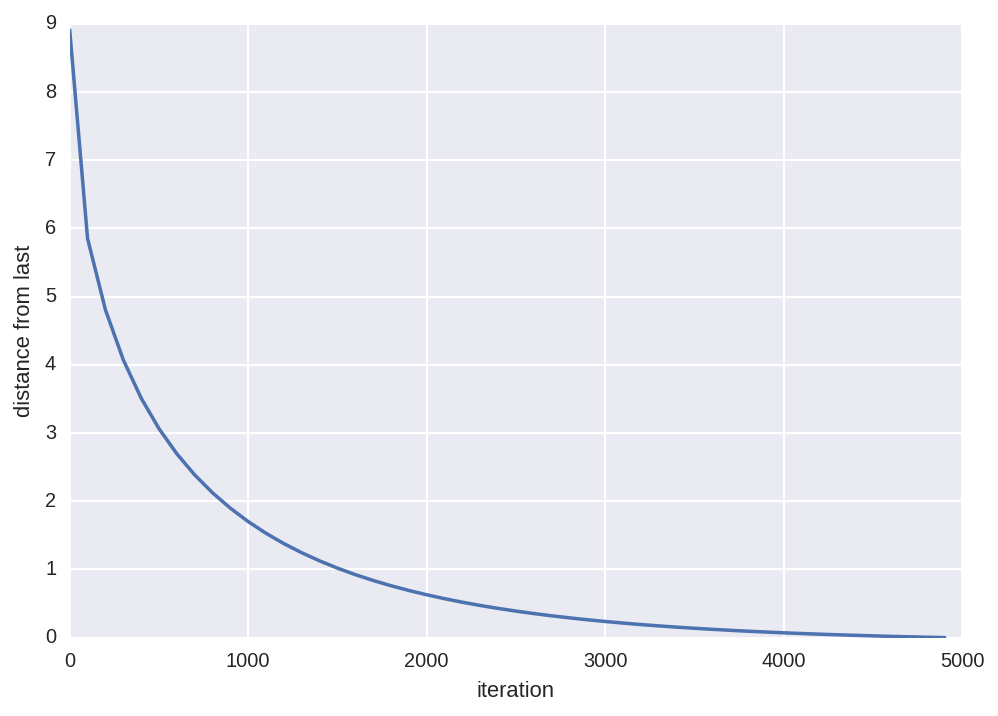

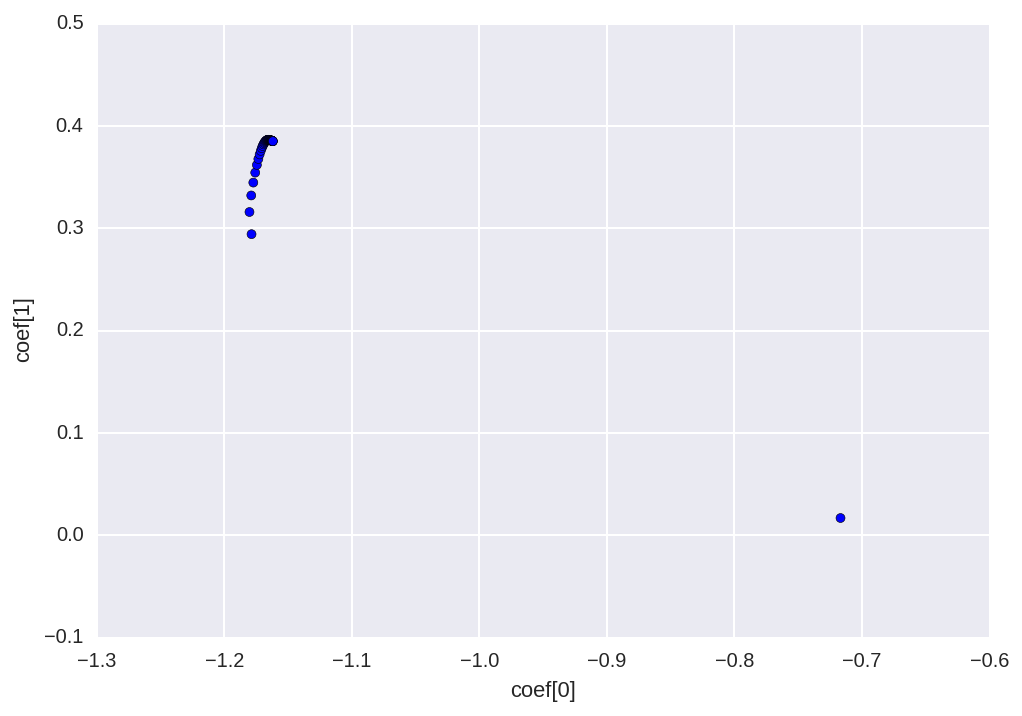

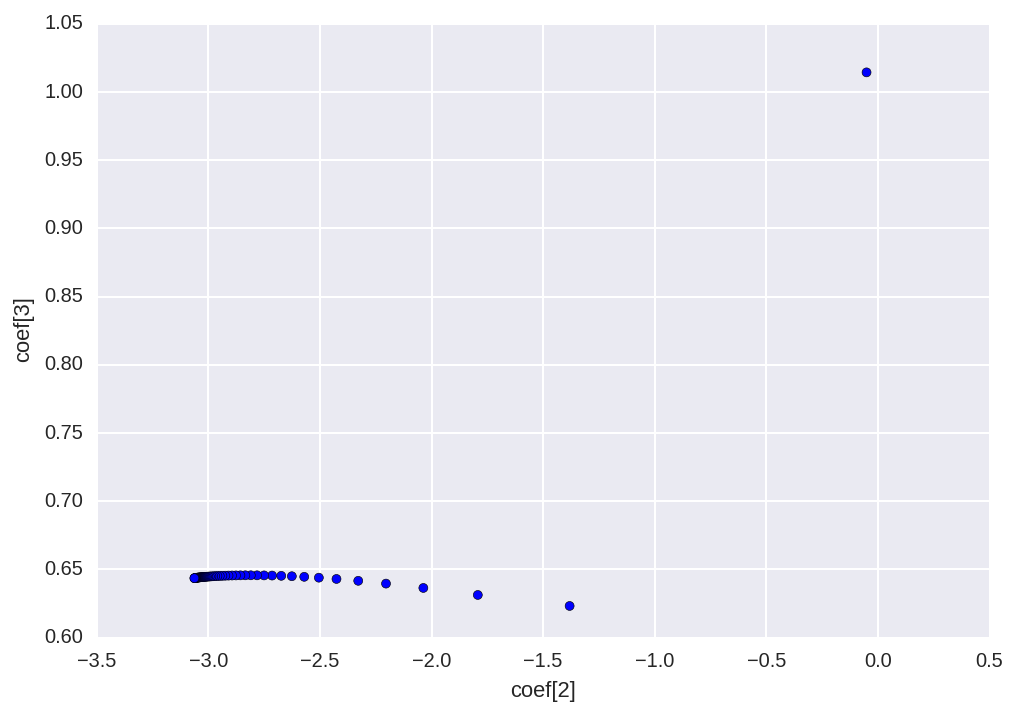

In [12]:
Xt = preprocessing.StandardScaler().fit_transform(X)

coefs = []
iterations = range(1,5000,100)
for n_iter in iterations:
    sgd_regressor = linear_model.SGDRegressor(random_state=42, n_iter=n_iter).fit(Xt, y)
    coefs.append(sgd_regressor.coef_)

    
dists = [np.linalg.norm(coef - coefs[-1]) for coef in coefs]
plt.figure()
plt.plot(iterations, dists)
plt.xlabel('iteration')
plt.ylabel('distance from last')

plt.figure()
plt.scatter([c[0] for c in coefs], [c[1] for c in coefs])
plt.xlabel('coef[0]')
plt.ylabel('coef[1]')

plt.figure()
plt.scatter([c[2] for c in coefs], [c[3] for c in coefs])
plt.xlabel('coef[2]')
plt.ylabel('coef[3]')
plt.show()

# Multiclass Classification Problems.

So far we have talked about Two-Class classificaiton in the context of Logistic Regression.  But what if we have more than two classes?  There are generally two strategies to "bootstrap" a binary classifier to a multi-class classifier: 
1. **One-versus-All**: For each class $k=1,\ldots,K$, build a binary classifier for all points with label $y = k$ versus $y \neq k$.
1. **All-versus-All**: For each class $k \neq k'$, construct a binary classifier to distinguish between class $k$ and $k'$.
There's also the notion of Error-Correcting Output Codes 

[Scikit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) uses One-versus-All for Multi-class Logistic Regression.  If $f_k(x)$ is the predictor for class $k$, the probability of class $k$ is just the normalized predicitons,

$$ p_k = \frac{f_k(x)}{\sum_k f_k(x)}$$

Scikit provides a way to do other multiclass-from-binary-classifier strategies in [Scikit-Documentation](http://scikit-learn.org/0.11/modules/multiclass.html),

## Minimizing L^1 rather than L^2 error in a regression.

In traditional linear regression the penalty is quadratic, which unfortuantely overpenalizes for outliers.  We often want to use absolute error instead.  There are a few ways to do this:
1. The first is to use SVM Regression `sklearn.svm.SVR`.  For `SVR`, the penalty function is the function

$$ \max(|x| - \epsilon, 0) $$

1. The stochastic gradient gegressor (`sklearn.linear_model.SGDRegressor`) offers the [Huber loss function](http://en.wikipedia.org/wiki/Huber_loss_function),

$$ \frac{1}{2} x^2 I_{|x| \le \delta} + \delta\left(|x| - \frac{\delta}{2}\right)  I_{|x| > \delta}$$

We plot out a comparison of these methods below:

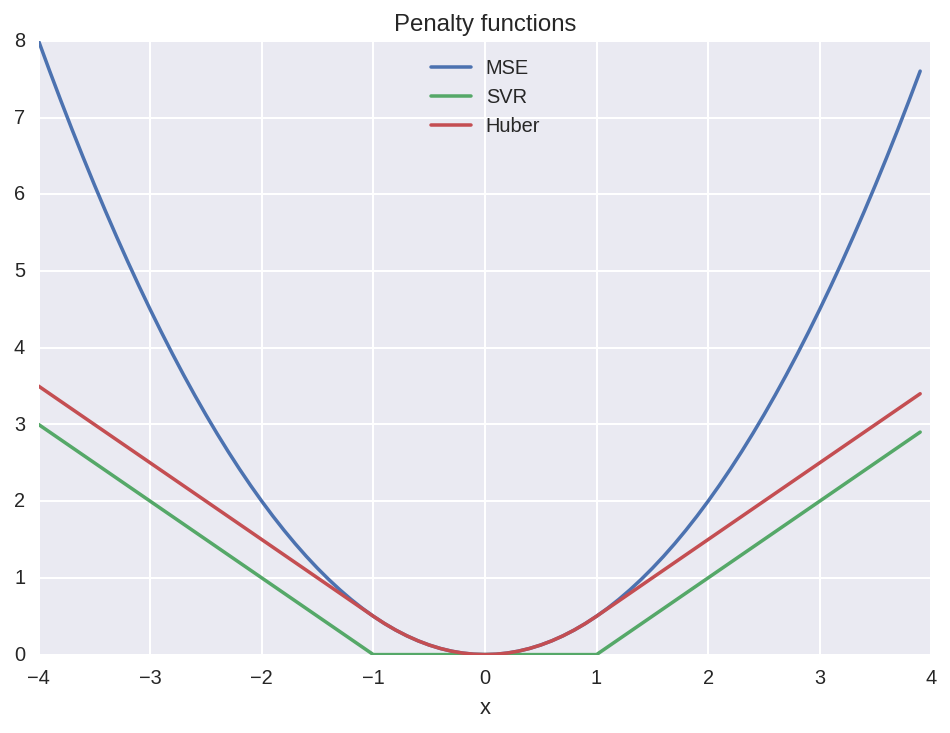

In [13]:
# plot of Huber, SVR, and MSE penalty functions

x = np.arange(-4,4,.1)
y_quad = x ** 2/2
y_svr = np.maximum(np.abs(x)-1.,0)
y_huber = (x ** 2/2) * (np.abs(x) <= 1) + (np.abs(x) - .5) * (np.abs(x) > 1)

plt.title("Penalty functions")
plt.xlabel("x")
plt.plot(x, y_quad, label="MSE")
plt.plot(x, y_svr, label="SVR")
plt.plot(x, y_huber, label="Huber")
plt.legend(loc='upper center')

## Quantile Regression

In a linear regresion, the $L^2$ penalty in the error function means the algorithm is very sensitive to outliers (**Question**: can you see why?).  One way to control features that have fat tails is to take a quantile transformation of them.

           Model       MSE
0            Col       DIS
1      Max Ratio  1.224679
2  Average Ratio  1.360085


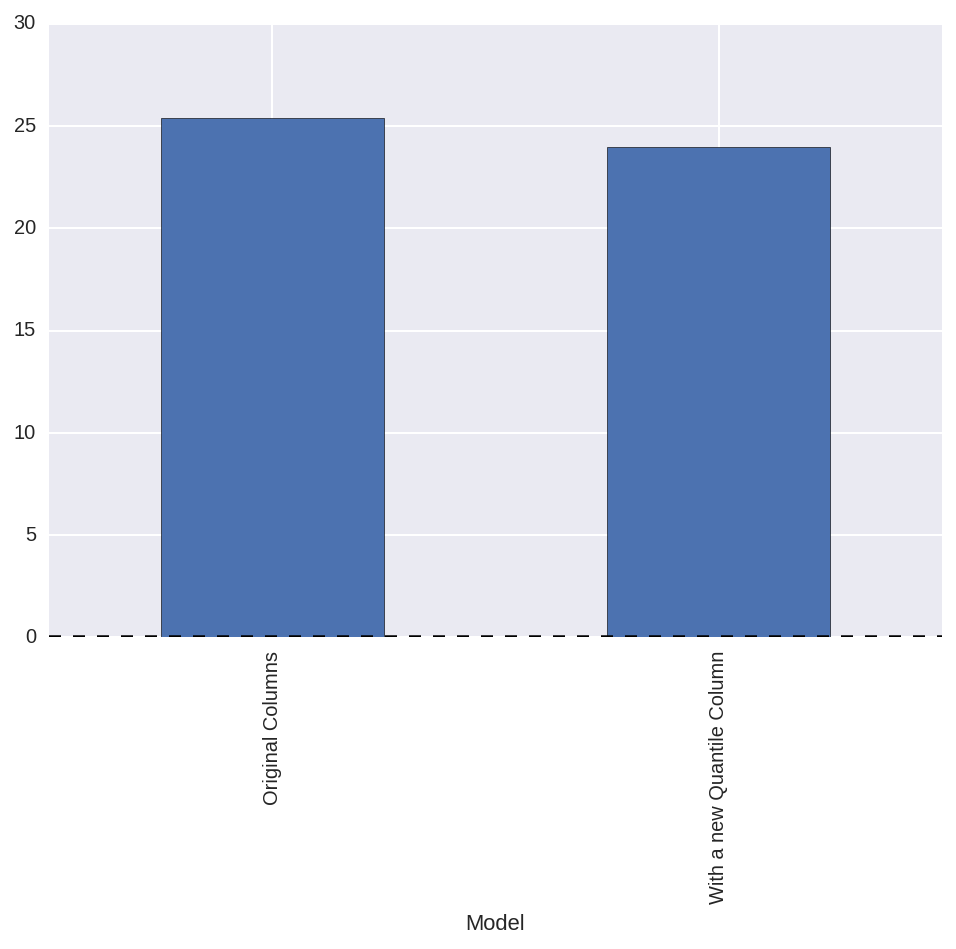

In [14]:
# find the column with the highest L^2 moment compared to L^1 moment: this happens to be DIS

l2_to_l1 = np.array([np.sqrt(X[col].var()) / (X[col] - X[col].mean()).abs().mean() for col in original_columns])
max_col_idx = np.argmax(l2_to_l1)

max_col_idx = 7
print pd.DataFrame([
    ("Col", X.columns[max_col_idx]),
    ("Max Ratio", l2_to_l1[max_col_idx]),
    ("Average Ratio", l2_to_l1.mean())
], columns=["Model", "MSE"])

# create a new list of column names with this column as _Quantile
new_columns = list(original_columns)
new_columns[max_col_idx] = original_columns[max_col_idx] + "_Quantile"

# sort data in this column to compute the "quantilized" value
def to_quantile(data):
    sorted_data = sorted(data)
    return np.array([1. * sorted_data.index(d)  / len(data) for d in data])
X[new_columns[max_col_idx]] = to_quantile(X[X.columns[max_col_idx]])

compute_error(linear_model.LinearRegression(), X[new_columns], y)

# Compare results
pd.DataFrame([
    ("Original Columns", compute_error(linear_model.LinearRegression(), X[original_columns], y)),
    ("With a new Quantile Column", compute_error(linear_model.LinearRegression(), X[new_columns], y))
], columns=["Model", "MSE"]).plot(x="Model", y="MSE", kind="Bar")

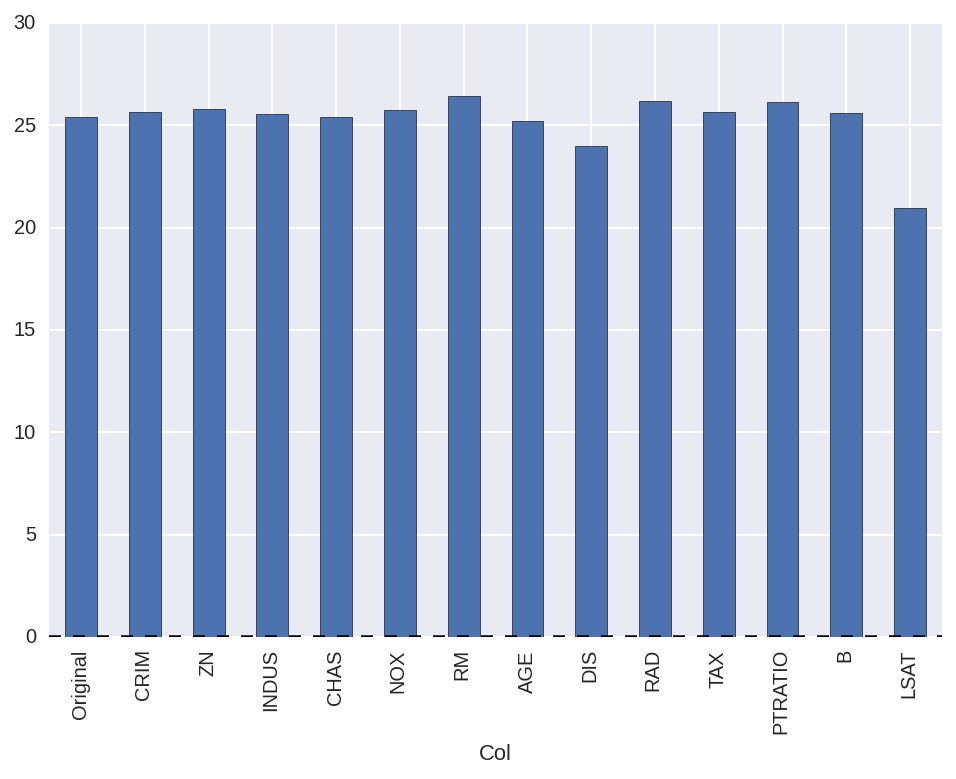

In [15]:
# Let's see how close 

def compute_regression_with_quatilized_feature(max_col_idx):
    # create a new list of column names with this column as _Quantile
    new_columns = list(original_columns)
    new_columns[max_col_idx] = original_columns[max_col_idx] + "_Quantile"

    # sort data in this column to compute the "quantilized" value
    def to_quantile(data):
        sorted_data = sorted(data)
        return np.array([1. * sorted_data.index(d)  / len(data) for d in data])
    X[new_columns[max_col_idx]] = to_quantile(X[X.columns[max_col_idx]])

    return compute_error(linear_model.LinearRegression(), X[new_columns], y)

# Assemble results and plot
quantilized_models = pd.DataFrame([("Original", compute_error(linear_model.LinearRegression(), X[original_columns], y))] + 
             [(original_columns[i],
               compute_regression_with_quatilized_feature(i))
            for i in range(len(original_columns))],
columns=["Col", "Quantile"])
quantilized_models.plot(x="Col", y="Quantile", kind="Bar")

## GLM

TODO: add in the future

# Module Questions

**Question**:
1. How would you assess whether a relationship is actually linear?
1. If instead of being able to observe $y$, you observe a noisy estimate of $y \pm \epsilon$ with unbiased normally distributed noise.  What is the effect on your estimates $\beta$?
1. When you loaded your data, you unwittingly loaded each row of the data (both $X$ and $y$) twice and performed the same regression.  What is the effect on your estimates $\beta$?
1. When you loaded your data, you unwittingly loaded each column of the features (just $X$) twice and performed the same regression.  What is the effect on your estimates $\beta$?
1. Everything we've talked about so far involves loading all the data into memory.  What if you have more data than you can fit into memory?

# Spoilers

# Answers

### Linear Regression

1. The hint pretty much gives you the answer since a projection of a point onto a plane is the closest you can get to that point while still remaining on the plane.  Alternatively, you can differentiate the matrix expression and take the first-order condition and find the zero.
1. If $X^T X$ is singular or nearly singular, it is hard to invert the values become highly unstable numerically.
1. This might occur when $p > n$, or if a column is repeated.
1. When $X$ is degenerate, it becomes impossible to identify a unique $\beta$ to minimize the objective function.
1. Outliers can really skew the results of $\beta$ because of the quadratic penalty.  Remember, that minimizing the least squares is essentially looking for a mean, which is affected by outliers.  You can transform the model via quantiles to reduce the effect of noise, bin the data, or use floors and caps on the data.
1. When $p > n$, $X$ is degenerate and you no longer have a unique $\beta$.  To deal with this, you can use PCA to reduce $p$ or use one of the "regularization" techniques below.
1. For non-negative $y$, try using the $\log(y)$.  If $y$ is always within a fixed $[a,b]$, use $$\frac{y - a}{b-a}\,.$$

### Ridge Regression

1. The formula for $\hat \beta$ can be deduced by completing the square.  Then the problem looks exactly like an ordinary Least Squares problem with a different $X$ matrix.
1. Recall that the prior is
$$\exp \left[ -\left( \alpha \frac{\beta}{2 \sigma} \right)^2\right]$$
when $\alpha = 0$, this is a flat "improper" prior (it's not really a distribution).  This is often what a bayesian calls improper.
1. Increasing $\alpha$ shrinks the terms of $\beta$ towards zero, with smaller values of $\beta$ shrunk faster.

### Lasso Regression

1. The prior are iid two-sided exponential functions.
1. What is the effect of varying $\alpha$ on the learned coefficients $\beta$?

### Logistic Regression

In Logistic Regression, the values of $y$ are categorical ($0$ or $1$) and assumed to be distributed binomially.  We assume that the probability $p(X_{j\cdot})$ that $y = 1$ is related to $X$ via the logit function:

$$ \log \frac{p(X_{j\cdot})}{1-p(X_{j\cdot})} = X_{j\cdot} \cdot \beta\,. $$

Notice that the logit function $\log \frac{\cdot}{1-\cdot}$ maps the real numbers $[0,1]$ to $\mathbb{R}$.  The full likelihood function is given by

$$ L(\beta) = \prod_j p(X_{j\cdot})^{y_j} (1-p(X_{j\cdot}))^{y_j}\,. $$

Since the objective is to maxmize $L$, we can use gradient descent (on $\log(L)$) to compute the answer.  The equations are worked out [here](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf).

In the following example, we'll try to predict whether the home price is greater than or less than $25K.

1.  The negative Log-likelihood is

    $$- \log(L(\beta)) = - \sum_j y_j \log(f(X_{j\cdot})) + y_j \log(1-f(X_{j\cdot}))$$

1.  The $L^2$ constraint is

    $$- \sum_j y_j \log(f(X_{j\cdot} \cdot \beta)) + y_j \log(1-f(X_{j\cdot} \cdot \beta)) + \alpha \| \beta \|^2_2$$
    
1. Regularization
1. There's a `weight` parameter to Scikit's `LogisticRegression` that let's you reweight different training examples.  When might you want to do this?  One answer is if one class is very common (e.g. 99% of the data), you can downsample it it and then use the weight to give an unbiased estimate.  A classic example is click-prediction in advertising, where clicks are rare compared to non-clicks.

### Module Questions

1. To assess if the relationship is linear, plot the distribution of the residuals as a function of $x$.  If there's a systematic bias, take a look at it and see what's going on.
1. With extra (unbiased) noise, the estimate of $\beta$ does not change (on average), but the the confidence goes down.
1. Loading rows twice has no effect on $\beta$ but it does artificially increase your confidence (dividing it by a factor $\sqrt{2}$)
1. The problem becomes degenerate and $\beta_j$ is now split between $\beta_{j'}$ and $\beta_{j''}$ such that $\beta_j = \beta_{j'} + \beta_{j''}$.
1. All of these problems can be solved using gradient descent, which only requires a *stream* of data, rather than the entire dataset.  Linear regression (with either $L^2$, Huber penalty, epsilon insensitive) can be solved using `sklearn.linear_model.SGDRegressor` and logistic regression can be solved using `sklearn.linear_model.SGDClassifier`.  These methods implement a `partial_fit` method, which can iteratively updates the coefficients on small chunks of data.  In this case, you are no longer ram constrained, but constrained in the amount of time it takes to read data from disk.

In [ ]:
X = np.random.randn(24).reshape([6,4])
y = np.random.randn(6)

# linear regression, the solution is overdetermined but 
# scikit uses's scipy's SVD algorithm which is robust to this.
X_two_col = np.hstack([X, X[:,-1:]])
clf = linear_model.LinearRegression().fit(X,y)
clf.coef_

*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*